# Visualization

## Setup

In [1]:
# imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from os import walk, path

In [12]:
# load data

# get all filenames from the directory data
f = []
for (dirpath, dirnames, filenames) in walk("data"):
    f.extend(filenames)
    break

# load data from all files from the directory data
frames = []
for file in f:
    data = pd.read_json(path.join("data", file))
    frames.append(data)

# concat all data into one dataframe
raw_data = pd.concat(frames, ignore_index=True)

In [13]:
raw_data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'type', 'id', 'uri', 'track_href', 'analysis_url', 'duration_ms',
       'time_signature', 'genre'],
      dtype='object')

In [14]:
data = raw_data.drop(["uri", "id", "track_href", "analysis_url", "type"], axis=1)

## General data

In [5]:
data.columns

Index(['danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo',
       'duration_ms', 'time_signature', 'genre'],
      dtype='object')

In [6]:
data.shape

(160, 14)

In [7]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 160 entries, 0 to 60
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   danceability      160 non-null    float64
 1   energy            160 non-null    float64
 2   key               160 non-null    int64  
 3   loudness          160 non-null    float64
 4   mode              160 non-null    int64  
 5   speechiness       160 non-null    float64
 6   acousticness      160 non-null    float64
 7   instrumentalness  160 non-null    float64
 8   liveness          160 non-null    float64
 9   valence           160 non-null    float64
 10  tempo             160 non-null    float64
 11  duration_ms       160 non-null    int64  
 12  time_signature    160 non-null    int64  
 13  genre             160 non-null    object 
dtypes: float64(9), int64(4), object(1)
memory usage: 18.8+ KB


In [8]:
data.groupby('genre').describe()

danceability                                                           \
             count      mean       std    min     25%    50%     75%    max   
genre                                                                         
edm           61.0  0.688967  0.092737  0.460  0.6340  0.700  0.7490  0.870   
rock          99.0  0.483404  0.117075  0.219  0.4065  0.478  0.5675  0.767   

      energy            ... duration_ms           time_signature            \
       count      mean  ...         75%       max          count      mean   
genre                   ...                                                  
edm     61.0  0.814066  ...    172708.0  248759.0           61.0  3.967213   
rock    99.0  0.866071  ...    235200.0  395786.0           99.0  3.959596   

                                          
            std  min  25%  50%  75%  max  
genre                                     
edm    0.179556  3.0  4.0  4.0  4.0  4.0  
rock   0.244081  3.0  4.0  4.0  4.0  5.0  

[2 rows x 104 columns]

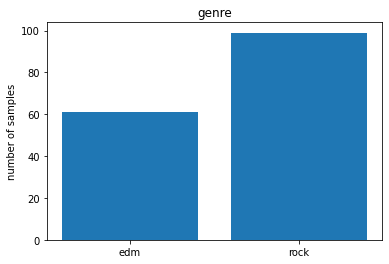

In [9]:
# get all numeric features
numeric_features = data.describe().columns

# get all features
all_features = data.columns

# get all categorical features (= color, clarity, cut) -> can be reused for other datasets!
categorical_features = set(all_features) - set(numeric_features)

for col in categorical_features:
  sorted_list = data[col].value_counts().sort_values().sort_index() # get the feature sorted
  labels = sorted_list.index.tolist()
  values = sorted_list.tolist()

  plt.bar(labels, values)
  plt.title(col)
  plt.ylabel("number of samples")
  plt.show()

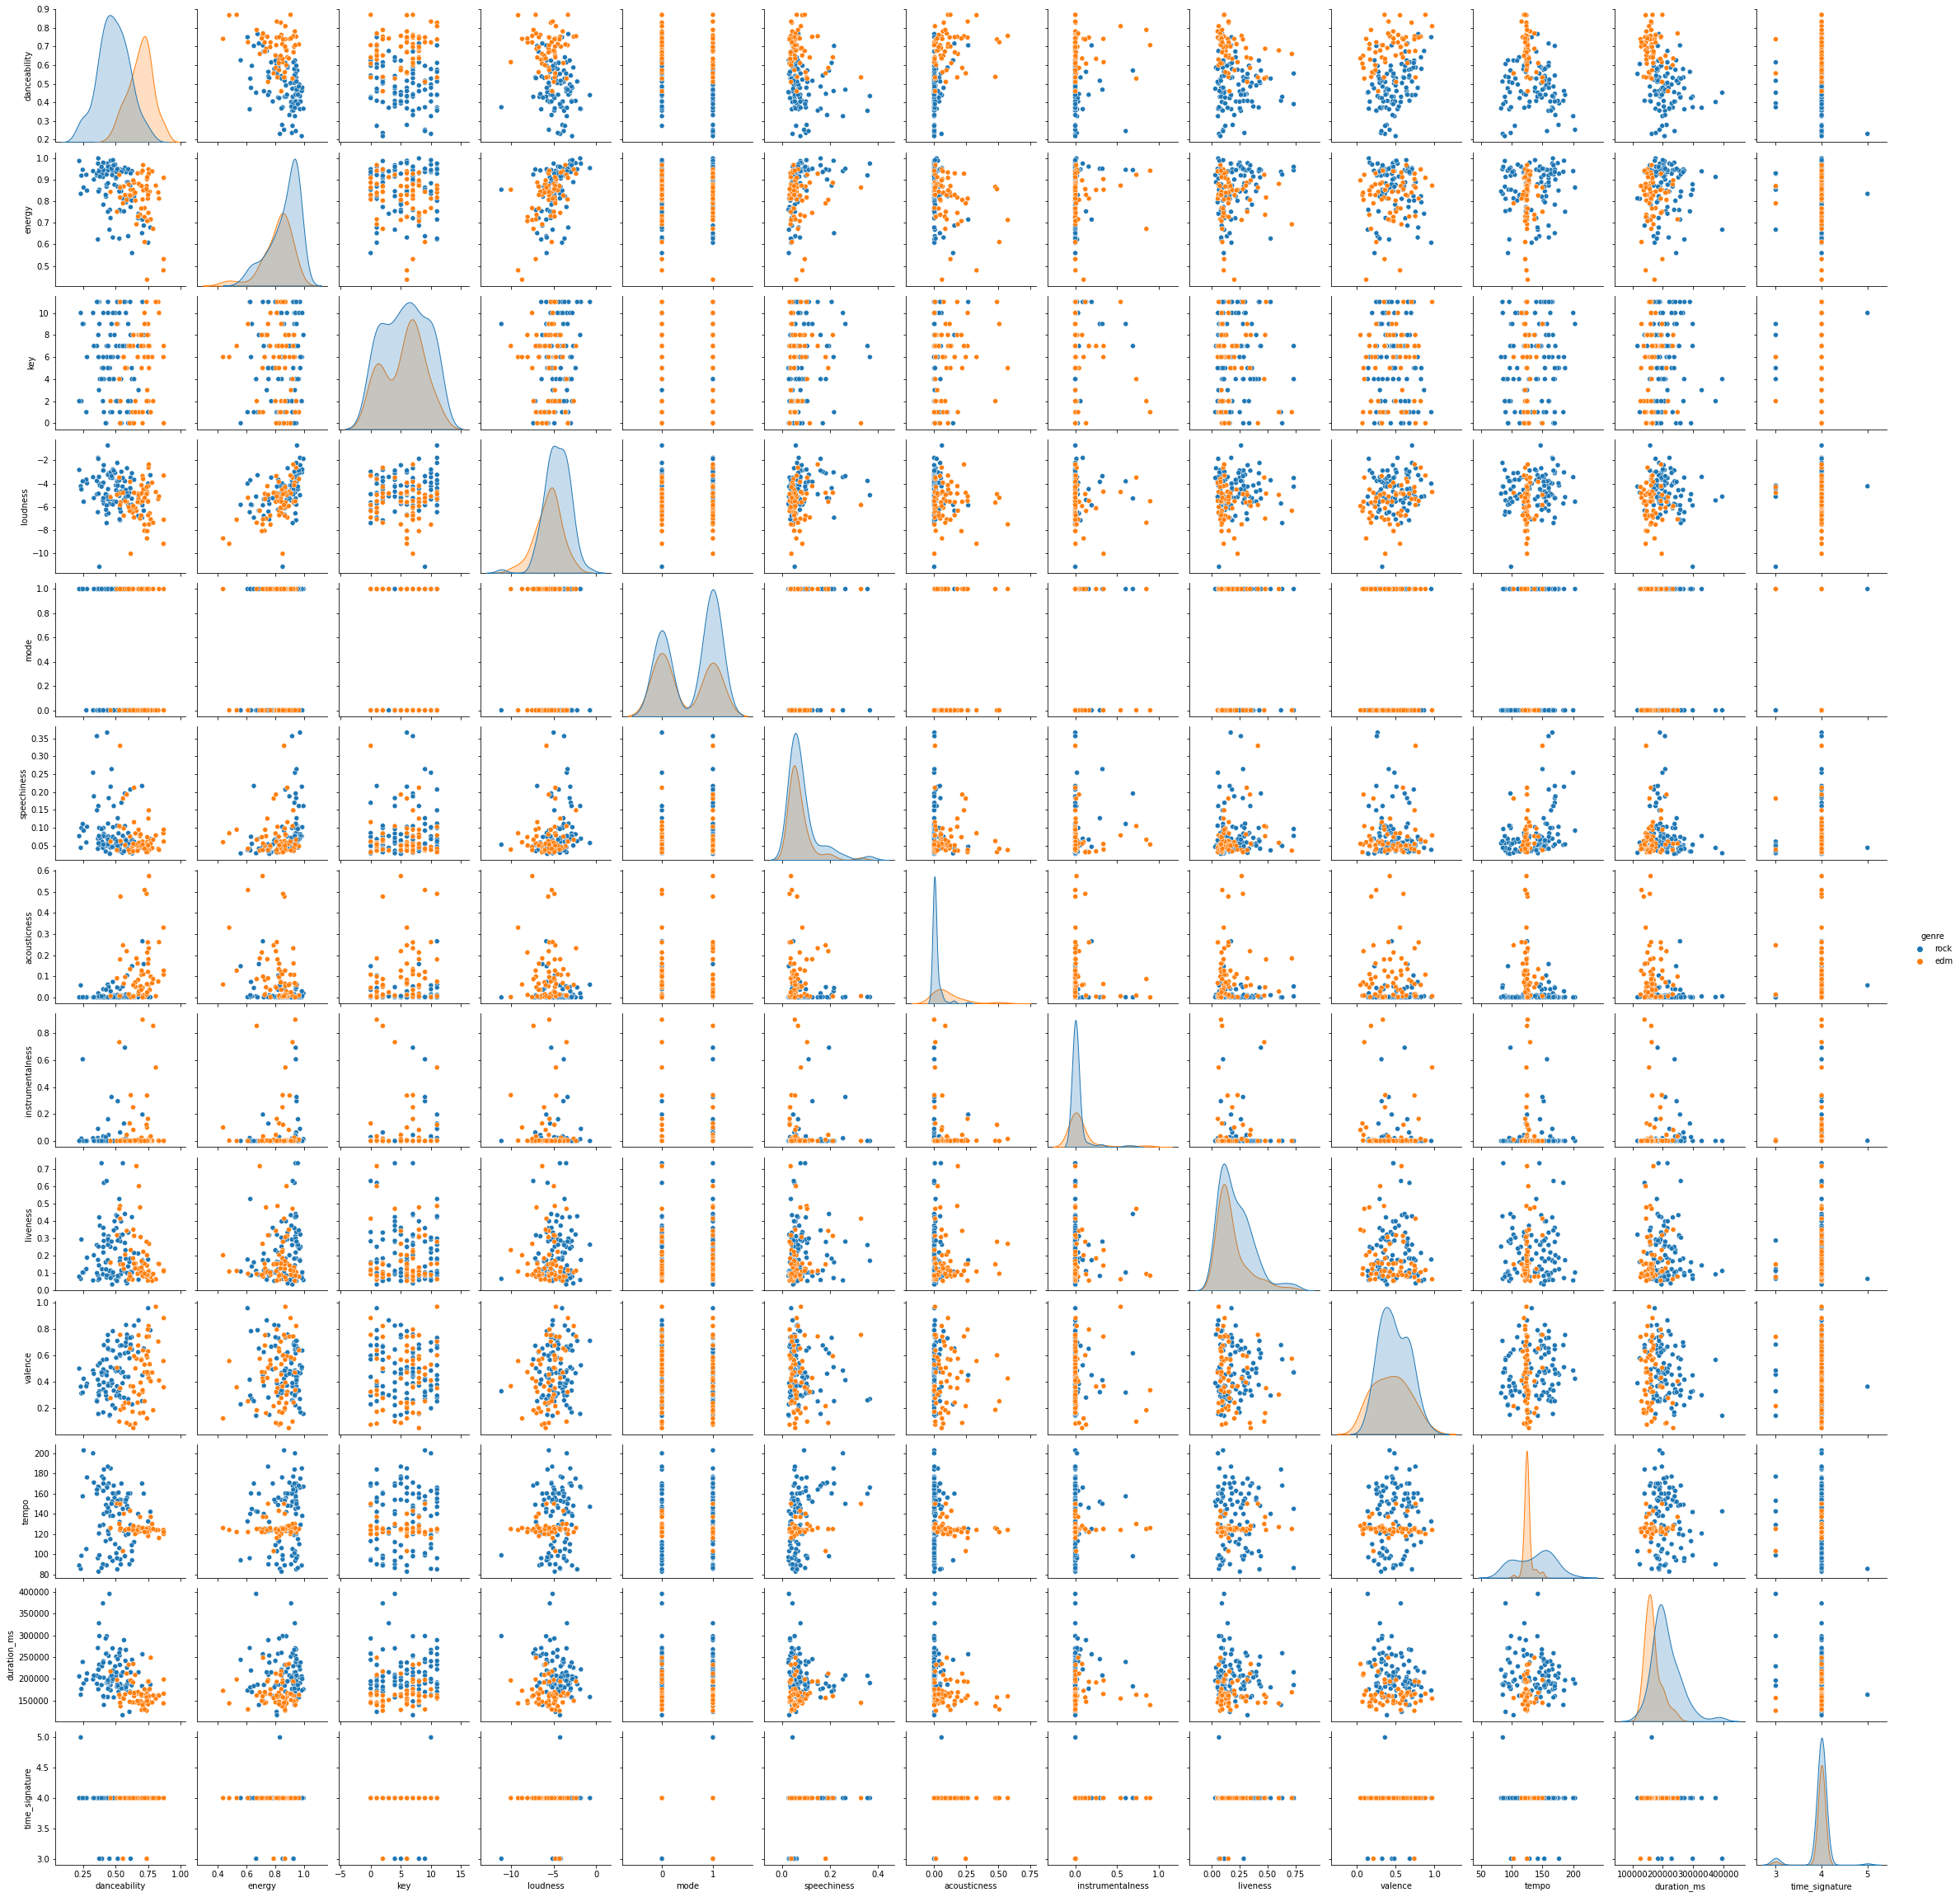

In [15]:
sns.pairplot(data=data, hue="genre")